In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv003.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [ ]:
%autoreload
#bioqic = mre_pinn.data.BIOQICPhantom('../data/BIOQIC/downloads')
#bioqic.download()
bioqic.load_mat()
bioqic.preprocess()
dataset = bioqic.to_dataset()
dataset.save_xarrays('../data/BIOQIC/phantom')

In [3]:
%autoreload
frequency = 80
example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', frequency, anat=True)
example.metadata

Loading ../data/BIOQIC/phantom/80/wave.nc
Loading ../data/BIOQIC/phantom/80/mre.nc
Loading ../data/BIOQIC/phantom/80/mre_mask.nc
Loading ../data/BIOQIC/phantom/80/anat.nc


  return key in self.data



Loading ../data/BIOQIC/phantom/80/anat_mask.nc


size  spacing  origin   limit   center  extent
variable dimension                                                
wave     x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
mre      x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
mre_mask x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
anat     x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375

In [4]:
example.describe()

dtype     count                     mean  \
variable component                                                  
wave     z          complex128  256000.0  -0.00008700+0.00007000j   
         x          complex128  256000.0   0.00006600+0.00000300j   
         y          complex128  256000.0   0.00014300-0.00055500j   
mre      scalar     complex128  256000.0  5833.823312+218.366417j   
mre_mask scalar          int64  256000.0   0.63810500+0.00000000j   
anat     z             float64  256000.0   317.1963002+0.0000000j   
         x             float64  256000.0   317.5180708+0.0000000j   
         y             float64  256000.0   316.9898007+0.0000000j   

                            std                 min                 25%  \
variable component                                                        
wave     z             0.003677 -0.014230-0.005919j -0.001781+0.001272j   
         x             0.004614 -0.011428+0.002524j -0.001673+0.001793j   
         y             0.013011 -0.026548+0.003513j -0.003184+0.001840j   
mre      scalar     5568.088756  0.000000+0.000000j  0.000000+0.000000j   
mre_mask scalar        0.727037  0.000000+0.000000j  0.000000+0.000000j   
anat     z           231.599891  0.000000+0.000000j   57.12500+0.00000j   
         x           232.539772  0.000000+0.000000j   57.12500+0.00000j   
         y           231.862697  0.000000+0.000000j   57.00000+0.00000j   

                                         50%                       75%  \
variable component                                                       
wave     z         -0.000189000-0.001859000j  0.001495000-0.000458000j   
         x          0.000053000+0.003829000j  0.001793000-0.006779000j   
         y          0.000298000+0.000855000j  0.003668000+0.000938000j   
mre      scalar     10097.662129+358.617637j  10097.662129+358.617637j   
mre_mask scalar     1.000000000+0.000000000j  1.000000000+0.000000000j   
anat     z          460.37000005+0.00000000j  525.87000005+0.00000000j   
         x          461.12000005+0.00000000j  526.70000005+0.00000000j   
         y          459.00000005+0.00000000j  527.00000000+0.00000000j   

                                          max  
variable component                             
wave     z           0.011644000+0.000187000j  
         x           0.011845000-0.002012000j  
         y           0.025939000-0.003657000j  
mre      scalar     35183.797846+2546.696361j  
mre_mask scalar      5.000000000+0.000000000j  
anat     z          2332.20000005+0.00000000j  
         x          2428.00000005+0.00000000j  
         y          2386.20000005+0.00000000j

Evaluating direct baseline
Evaluating FEM baseline
100%|██████████| 25/25 [01:11<00:00,  2.85s/it]


<IPython.core.display.Javascript object>


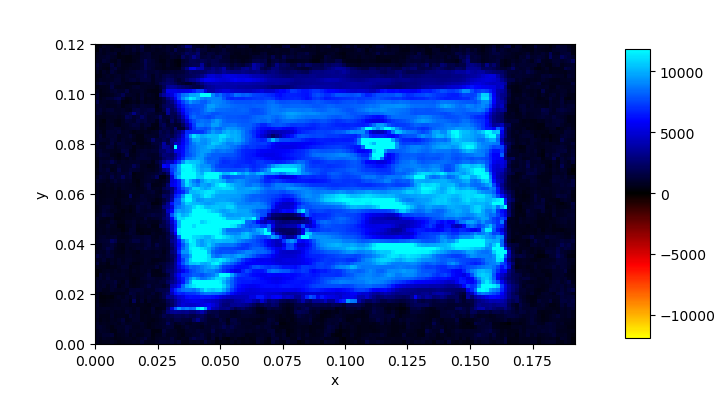

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


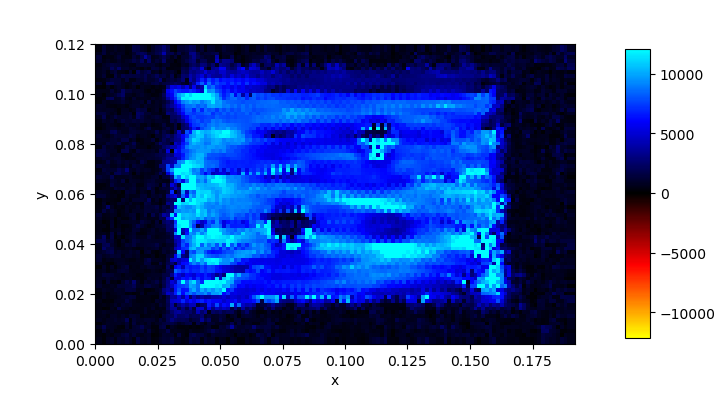

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [5]:
%autoreload
mre_pinn.baseline.eval_direct_baseline(example, frequency)
mre_pinn.baseline.eval_fem_baseline(example, frequency, mesh_scale=2, hetero=True)
example.view('direct', 'fem', polar=True, ax_height=3)

<IPython.core.display.Javascript object>


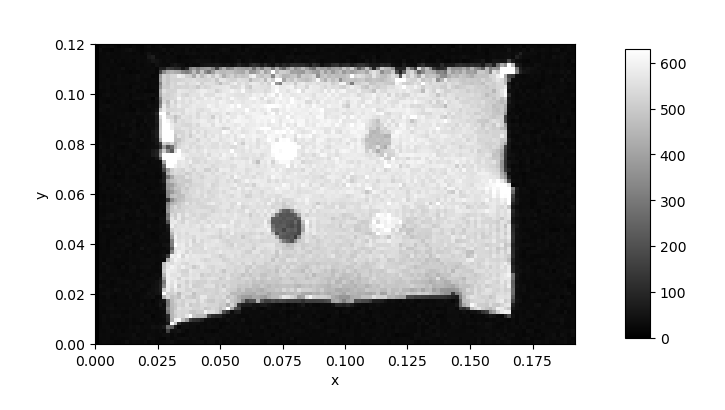

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


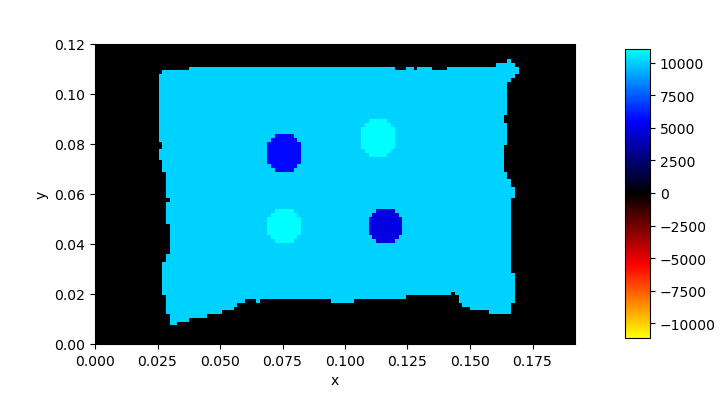

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [6]:
%autoreload
example.view('anat', 'mre', ax_height=3, mask=0.5)

In [13]:
pde = mre_pinn.pde.WaveEquation.from_name('hetero', omega=example.wave.frequency.item(), detach=True)

In [14]:
%autoreload
pinn = mre_pinn.model.MREPINN(
    example,
    omega=60,
    n_layers=5,
    n_hidden=128,
    activ_fn='st',
    polar_input=False
)
pinn

MREPINN(
  (u_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=6, bias=True)
  )
  (mu_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=8, bias=True)
  )
)

In [10]:
%autoreload
model = mre_pinn.training.MREPINNModel(
    example, pinn, pde,
    loss_weights=[1, 0, 100, 1e-10],
    pde_warmup_iters=5000,
    pde_step_iters=5000,
    pde_init_weight=1e-12,
    n_points=1024
)
model.compile(optimizer='adam', lr=1e-4, loss=mre_pinn.training.losses.msae_loss)

Compiling model...
'compile' took 0.032692 s



In [15]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100)

# iterations: 100
Data time/iter:  0.0179s (12.10%)
Model time/iter: 0.0253s (17.09%)
Loss time/iter:  0.1049s (70.81%)
Total time/iter: 0.1481s
Total time: 14.8121s
1k iters time: 2.47m
10k iters time: 24.69m
100k iters time: 4.11h


<IPython.core.display.Javascript object>


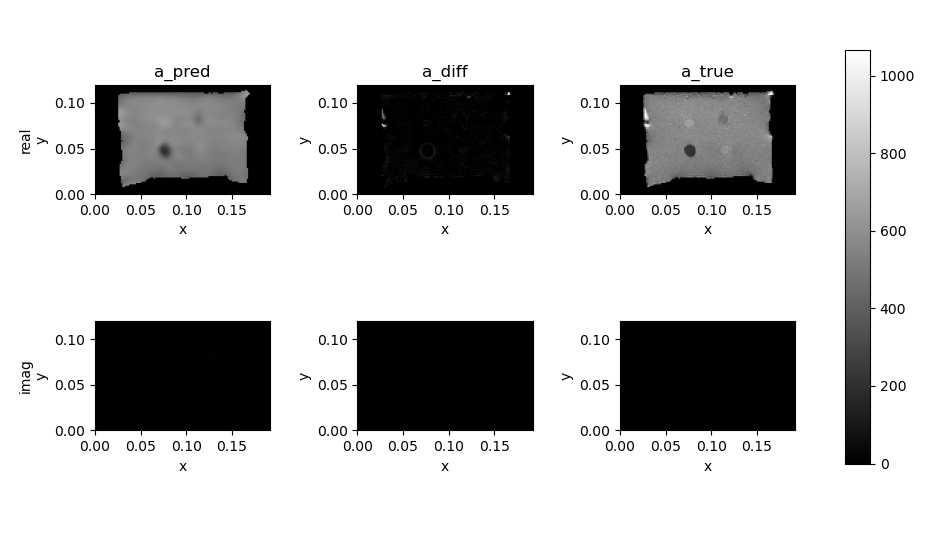

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


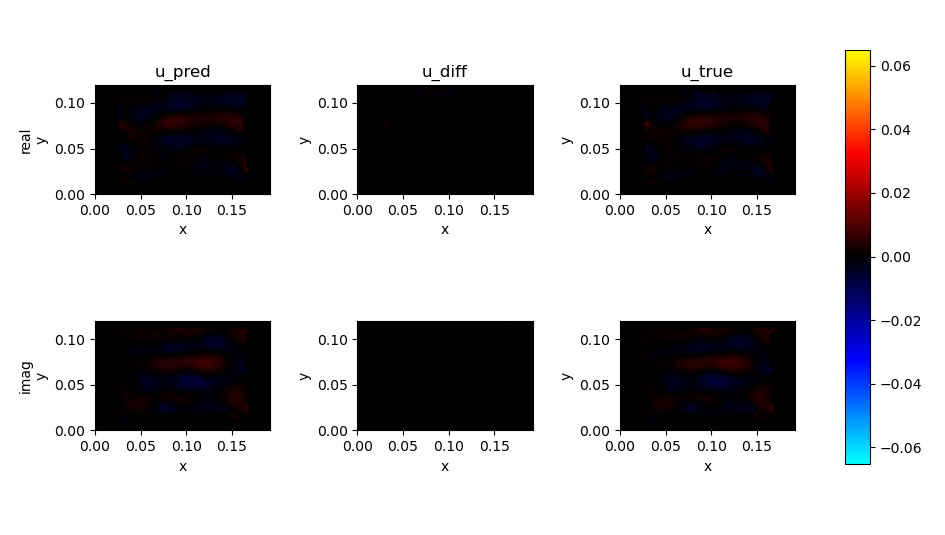

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


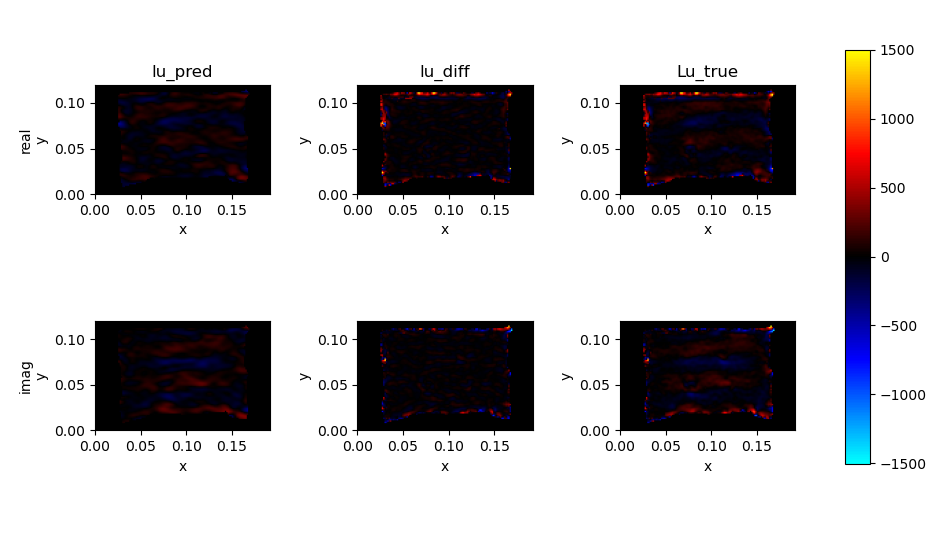

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


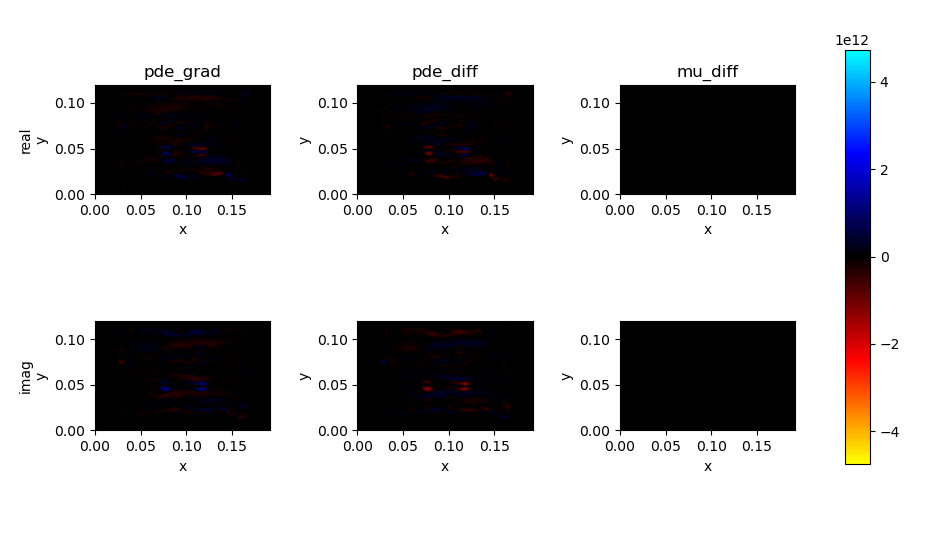

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


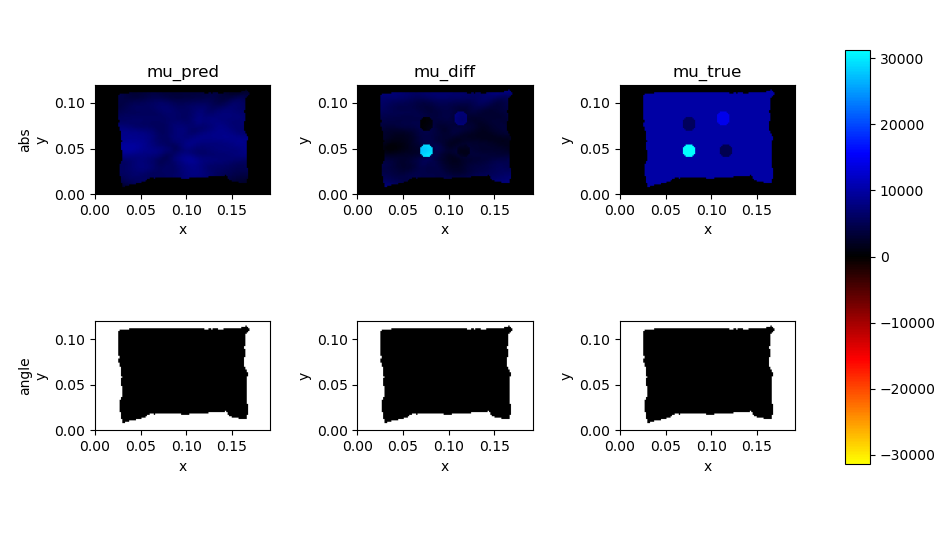

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


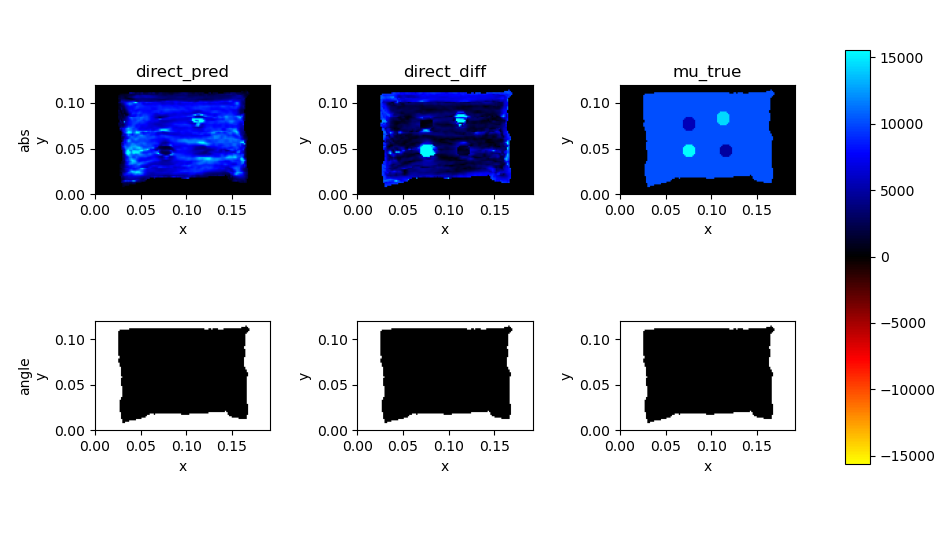

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


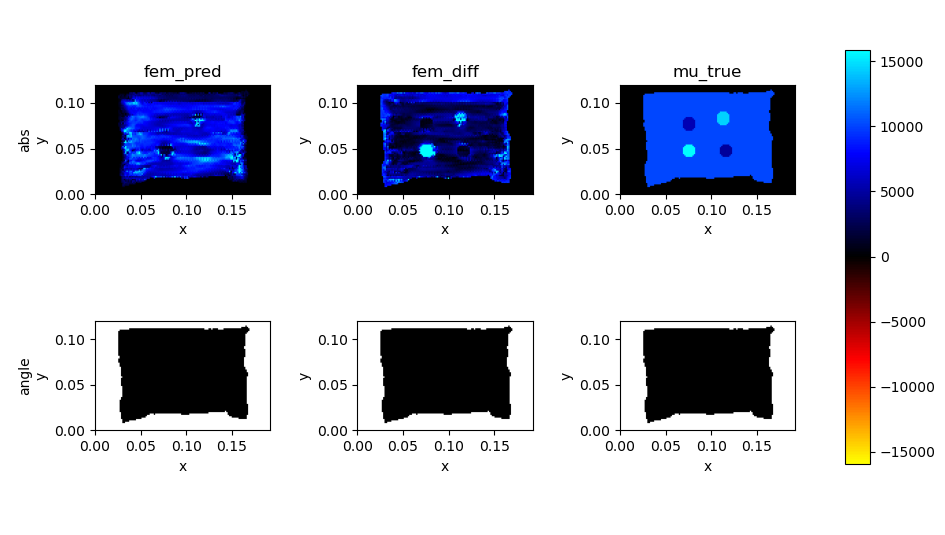

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

In [22]:
%autoreload
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)
test_eval.model = model
test_eval.test()

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [6.04e-04, 0.00e+00, 2.09e+07, 0.00e+00]    [6.03e-04, 0.00e+00, 2.07e+07, 0.00e+00]    []  


<IPython.core.display.Javascript object>


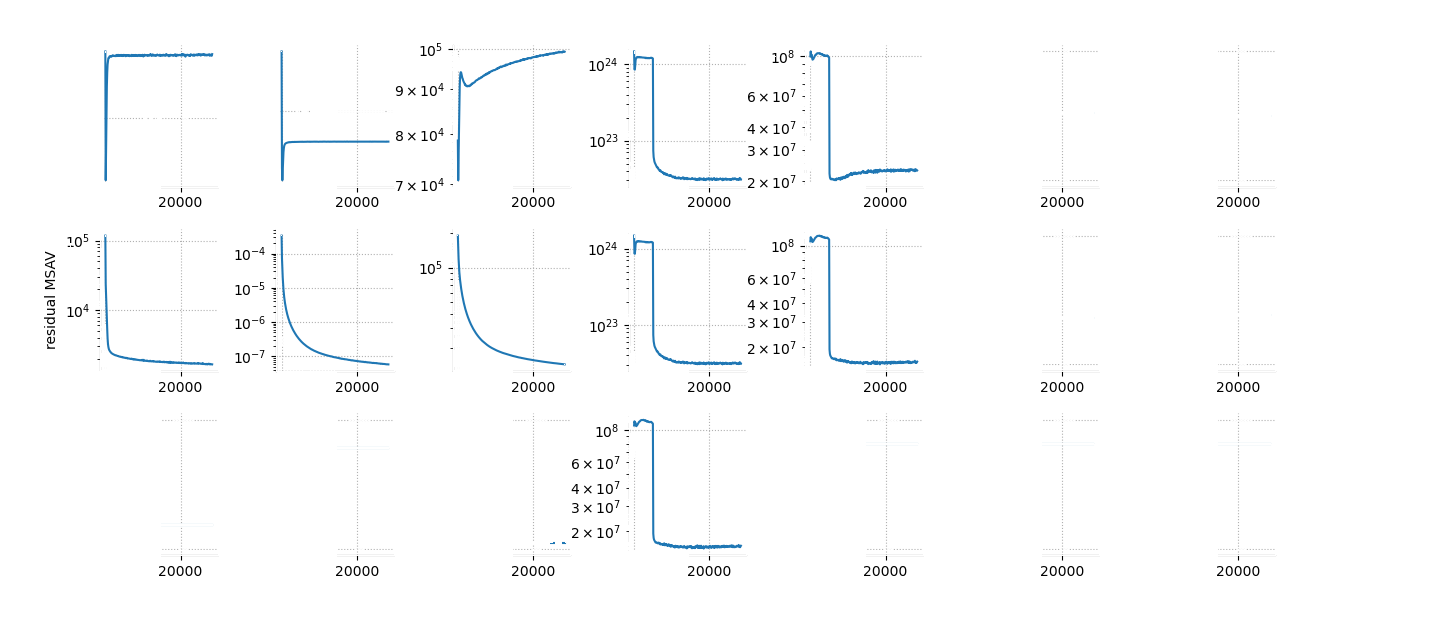

<IPython.core.display.Javascript object>


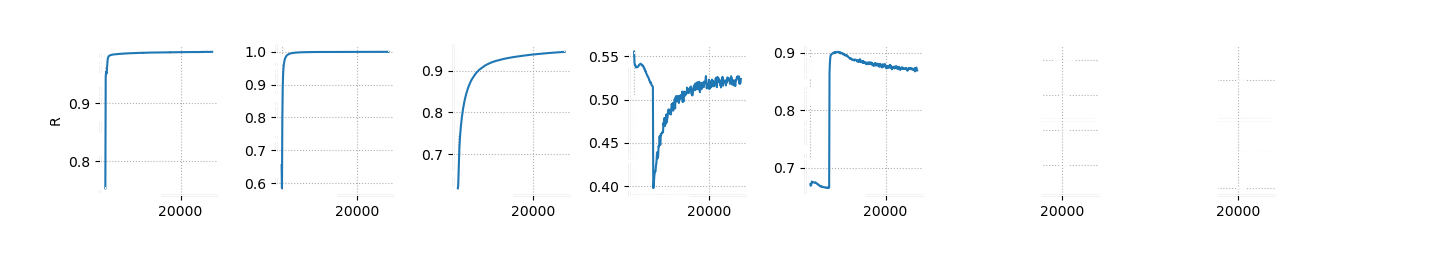

<IPython.core.display.Javascript object>


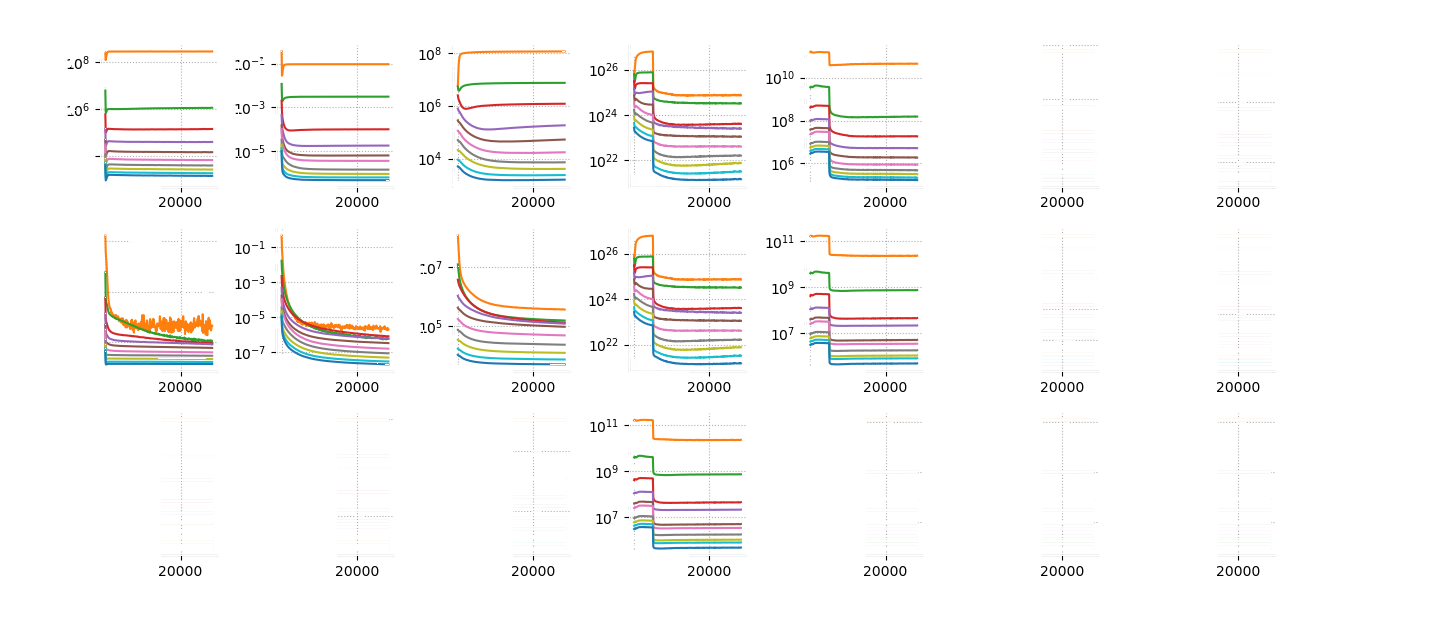

<IPython.core.display.Javascript object>


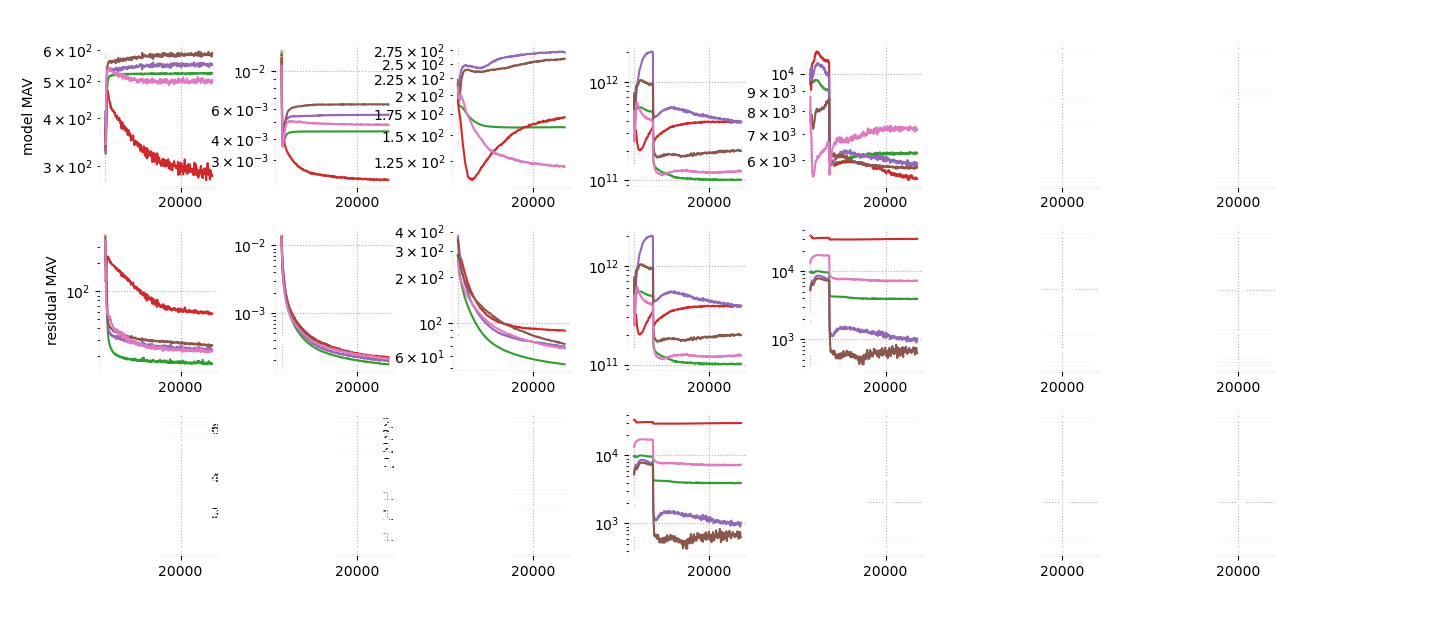

Time spent testing: 105.3341 (35.28%)
10        [4.79e-04, 0.00e+00, 1.06e+07, 0.00e+00]    [4.89e-04, 0.00e+00, 1.04e+07, 0.00e+00]    []  
20        [3.75e-04, 0.00e+00, 6.82e+06, 0.00e+00]    [3.98e-04, 0.00e+00, 6.52e+06, 0.00e+00]    []  
30        [3.21e-04, 0.00e+00, 6.09e+06, 0.00e+00]    [3.28e-04, 0.00e+00, 5.86e+06, 0.00e+00]    []  
40        [2.64e-04, 0.00e+00, 5.56e+06, 0.00e+00]    [2.74e-04, 0.00e+00, 5.49e+06, 0.00e+00]    []  
50        [2.30e-04, 0.00e+00, 5.03e+06, 0.00e+00]    [2.33e-04, 0.00e+00, 5.11e+06, 0.00e+00]    []  
60        [1.95e-04, 0.00e+00, 4.75e+06, 0.00e+00]    [2.02e-04, 0.00e+00, 4.88e+06, 0.00e+00]    []  
70        [1.80e-04, 0.00e+00, 4.71e+06, 0.00e+00]    [1.78e-04, 0.00e+00, 4.69e+06, 0.00e+00]    []  
80        [1.64e-04, 0.00e+00, 4.85e+06, 0.00e+00]    [1.59e-04, 0.00e+00, 4.51e+06, 0.00e+00]    []  
90        [1.39e-04, 0.00e+00, 4.32e+06, 0.00e+00]    [1.43e-04, 0.00e+00, 4.35e+06, 0.00e+00]    []  
100       [1.29e-04, 0.00e+00, 3.95

780       [7.87e-06, 0.00e+00, 6.22e+05, 0.00e+00]    [7.96e-06, 0.00e+00, 5.33e+05, 0.00e+00]    []  
790       [7.67e-06, 0.00e+00, 7.49e+05, 0.00e+00]    [7.80e-06, 0.00e+00, 5.27e+05, 0.00e+00]    []  
800       [7.73e-06, 0.00e+00, 7.89e+05, 0.00e+00]    [7.65e-06, 0.00e+00, 5.25e+05, 0.00e+00]    []  
Time spent testing: 77.1195 (72.70%)
810       [7.51e-06, 0.00e+00, 4.90e+05, 0.00e+00]    [7.51e-06, 0.00e+00, 5.21e+05, 0.00e+00]    []  
820       [7.38e-06, 0.00e+00, 5.87e+05, 0.00e+00]    [7.39e-06, 0.00e+00, 5.20e+05, 0.00e+00]    []  
830       [7.34e-06, 0.00e+00, 5.52e+05, 0.00e+00]    [7.25e-06, 0.00e+00, 5.13e+05, 0.00e+00]    []  
840       [6.99e-06, 0.00e+00, 6.31e+05, 0.00e+00]    [7.12e-06, 0.00e+00, 5.15e+05, 0.00e+00]    []  
850       [6.79e-06, 0.00e+00, 3.97e+05, 0.00e+00]    [7.00e-06, 0.00e+00, 5.05e+05, 0.00e+00]    []  
860       [6.53e-06, 0.00e+00, 4.30e+05, 0.00e+00]    [6.86e-06, 0.00e+00, 5.00e+05, 0.00e+00]    []  
870       [6.74e-06, 0.00e+00, 4.31e

1550      [2.94e-06, 0.00e+00, 2.90e+05, 0.00e+00]    [2.80e-06, 0.00e+00, 4.08e+05, 0.00e+00]    []  
1560      [2.78e-06, 0.00e+00, 3.76e+05, 0.00e+00]    [2.77e-06, 0.00e+00, 4.05e+05, 0.00e+00]    []  
1570      [2.88e-06, 0.00e+00, 4.96e+05, 0.00e+00]    [2.74e-06, 0.00e+00, 4.06e+05, 0.00e+00]    []  
1580      [2.97e-06, 0.00e+00, 4.46e+05, 0.00e+00]    [2.72e-06, 0.00e+00, 4.05e+05, 0.00e+00]    []  
1590      [2.69e-06, 0.00e+00, 3.44e+05, 0.00e+00]    [2.69e-06, 0.00e+00, 4.06e+05, 0.00e+00]    []  
1600      [3.02e-06, 0.00e+00, 6.02e+05, 0.00e+00]    [2.66e-06, 0.00e+00, 4.02e+05, 0.00e+00]    []  
Time spent testing: 134.0661 (77.89%)
1610      [2.65e-06, 0.00e+00, 3.09e+05, 0.00e+00]    [2.64e-06, 0.00e+00, 4.02e+05, 0.00e+00]    []  
1620      [2.59e-06, 0.00e+00, 3.36e+05, 0.00e+00]    [2.62e-06, 0.00e+00, 4.04e+05, 0.00e+00]    []  
1630      [2.79e-06, 0.00e+00, 4.59e+05, 0.00e+00]    [2.60e-06, 0.00e+00, 4.05e+05, 0.00e+00]    []  
1640      [2.55e-06, 0.00e+00, 2.88

2320      [1.57e-06, 0.00e+00, 3.41e+05, 0.00e+00]    [1.51e-06, 0.00e+00, 3.73e+05, 0.00e+00]    []  
2330      [1.66e-06, 0.00e+00, 3.82e+05, 0.00e+00]    [1.50e-06, 0.00e+00, 3.71e+05, 0.00e+00]    []  
2340      [1.55e-06, 0.00e+00, 2.36e+05, 0.00e+00]    [1.49e-06, 0.00e+00, 3.70e+05, 0.00e+00]    []  
2350      [1.53e-06, 0.00e+00, 2.86e+05, 0.00e+00]    [1.48e-06, 0.00e+00, 3.66e+05, 0.00e+00]    []  
2360      [1.58e-06, 0.00e+00, 4.33e+05, 0.00e+00]    [1.47e-06, 0.00e+00, 3.65e+05, 0.00e+00]    []  
2370      [1.44e-06, 0.00e+00, 4.05e+05, 0.00e+00]    [1.46e-06, 0.00e+00, 3.64e+05, 0.00e+00]    []  
2380      [1.50e-06, 0.00e+00, 3.84e+05, 0.00e+00]    [1.45e-06, 0.00e+00, 3.69e+05, 0.00e+00]    []  
2390      [1.45e-06, 0.00e+00, 4.26e+05, 0.00e+00]    [1.44e-06, 0.00e+00, 3.67e+05, 0.00e+00]    []  
2400      [1.39e-06, 0.00e+00, 3.93e+05, 0.00e+00]    [1.43e-06, 0.00e+00, 3.69e+05, 0.00e+00]    []  
Time spent testing: 60.8996 (80.03%)
2410      [1.40e-06, 0.00e+00, 3.33e

3100      [9.77e-07, 0.00e+00, 3.89e+05, 0.00e+00]    [9.66e-07, 0.00e+00, 3.49e+05, 0.00e+00]    []  
Time spent testing: 65.0204 (80.91%)
3110      [9.80e-07, 0.00e+00, 4.40e+05, 0.00e+00]    [9.63e-07, 0.00e+00, 3.48e+05, 0.00e+00]    []  
3120      [9.62e-07, 0.00e+00, 3.69e+05, 0.00e+00]    [9.58e-07, 0.00e+00, 3.49e+05, 0.00e+00]    []  
3130      [1.02e-06, 0.00e+00, 3.20e+05, 0.00e+00]    [9.49e-07, 0.00e+00, 3.49e+05, 0.00e+00]    []  
3140      [1.06e-06, 0.00e+00, 5.20e+05, 0.00e+00]    [9.50e-07, 0.00e+00, 3.47e+05, 0.00e+00]    []  
3150      [9.75e-07, 0.00e+00, 3.60e+05, 0.00e+00]    [9.39e-07, 0.00e+00, 3.46e+05, 0.00e+00]    []  
3160      [9.68e-07, 0.00e+00, 4.32e+05, 0.00e+00]    [9.38e-07, 0.00e+00, 3.49e+05, 0.00e+00]    []  
3170      [9.44e-07, 0.00e+00, 4.80e+05, 0.00e+00]    [9.38e-07, 0.00e+00, 3.51e+05, 0.00e+00]    []  
3180      [9.46e-07, 0.00e+00, 3.56e+05, 0.00e+00]    [9.24e-07, 0.00e+00, 3.46e+05, 0.00e+00]    []  
3190      [9.63e-07, 0.00e+00, 2.44e

3870      [7.79e-07, 0.00e+00, 3.78e+05, 0.00e+00]    [6.92e-07, 0.00e+00, 3.37e+05, 0.00e+00]    []  
3880      [7.80e-07, 0.00e+00, 3.44e+05, 0.00e+00]    [6.92e-07, 0.00e+00, 3.40e+05, 0.00e+00]    []  
3890      [7.15e-07, 0.00e+00, 2.97e+05, 0.00e+00]    [6.91e-07, 0.00e+00, 3.38e+05, 0.00e+00]    []  
3900      [7.20e-07, 0.00e+00, 2.76e+05, 0.00e+00]    [6.87e-07, 0.00e+00, 3.40e+05, 0.00e+00]    []  
Time spent testing: 56.5988 (82.03%)
3910      [7.45e-07, 0.00e+00, 3.30e+05, 0.00e+00]    [6.81e-07, 0.00e+00, 3.40e+05, 0.00e+00]    []  
3920      [7.98e-07, 0.00e+00, 3.97e+05, 0.00e+00]    [6.80e-07, 0.00e+00, 3.39e+05, 0.00e+00]    []  
3930      [7.24e-07, 0.00e+00, 5.55e+05, 0.00e+00]    [6.78e-07, 0.00e+00, 3.42e+05, 0.00e+00]    []  
3940      [7.10e-07, 0.00e+00, 2.99e+05, 0.00e+00]    [6.73e-07, 0.00e+00, 3.33e+05, 0.00e+00]    []  
3950      [7.12e-07, 0.00e+00, 4.64e+05, 0.00e+00]    [6.74e-07, 0.00e+00, 3.35e+05, 0.00e+00]    []  
3960      [6.57e-07, 0.00e+00, 3.52e

4640      [5.33e-07, 0.00e+00, 2.47e+05, 0.00e+00]    [5.28e-07, 0.00e+00, 3.30e+05, 0.00e+00]    []  
4650      [6.02e-07, 0.00e+00, 4.10e+05, 0.00e+00]    [5.30e-07, 0.00e+00, 3.28e+05, 0.00e+00]    []  
4660      [5.74e-07, 0.00e+00, 3.14e+05, 0.00e+00]    [5.29e-07, 0.00e+00, 3.28e+05, 0.00e+00]    []  
4670      [5.02e-07, 0.00e+00, 2.62e+05, 0.00e+00]    [5.22e-07, 0.00e+00, 3.26e+05, 0.00e+00]    []  
4680      [5.06e-07, 0.00e+00, 2.91e+05, 0.00e+00]    [5.20e-07, 0.00e+00, 3.30e+05, 0.00e+00]    []  
4690      [5.38e-07, 0.00e+00, 3.75e+05, 0.00e+00]    [5.20e-07, 0.00e+00, 3.32e+05, 0.00e+00]    []  
4700      [5.18e-07, 0.00e+00, 3.18e+05, 0.00e+00]    [5.15e-07, 0.00e+00, 3.28e+05, 0.00e+00]    []  
Time spent testing: 56.2167 (82.71%)
4710      [5.14e-07, 0.00e+00, 2.64e+05, 0.00e+00]    [5.16e-07, 0.00e+00, 3.29e+05, 0.00e+00]    []  
4720      [4.94e-07, 0.00e+00, 4.69e+05, 0.00e+00]    [5.15e-07, 0.00e+00, 3.27e+05, 0.00e+00]    []  
4730      [5.31e-07, 0.00e+00, 3.93e

5410      [4.99e-07, 0.00e+00, 3.31e+05, 1.63e+00]    [4.25e-07, 0.00e+00, 3.21e+05, 1.48e+00]    []  
5420      [4.84e-07, 0.00e+00, 2.79e+05, 1.54e+00]    [4.24e-07, 0.00e+00, 3.20e+05, 1.48e+00]    []  
5430      [4.40e-07, 0.00e+00, 3.12e+05, 1.44e+00]    [4.26e-07, 0.00e+00, 3.21e+05, 1.47e+00]    []  
5440      [4.26e-07, 0.00e+00, 4.14e+05, 1.52e+00]    [4.20e-07, 0.00e+00, 3.35e+05, 1.46e+00]    []  
5450      [4.44e-07, 0.00e+00, 4.04e+05, 1.62e+00]    [4.18e-07, 0.00e+00, 3.29e+05, 1.46e+00]    []  
5460      [4.72e-07, 0.00e+00, 6.85e+05, 1.49e+00]    [4.14e-07, 0.00e+00, 3.26e+05, 1.46e+00]    []  
5470      [4.59e-07, 0.00e+00, 4.95e+05, 1.55e+00]    [4.19e-07, 0.00e+00, 3.17e+05, 1.45e+00]    []  
5480      [4.41e-07, 0.00e+00, 2.60e+05, 1.44e+00]    [4.15e-07, 0.00e+00, 3.15e+05, 1.45e+00]    []  
5490      [4.28e-07, 0.00e+00, 3.15e+05, 1.53e+00]    [4.12e-07, 0.00e+00, 3.21e+05, 1.45e+00]    []  
5500      [4.22e-07, 0.00e+00, 5.87e+05, 1.42e+00]    [4.15e-07, 0.00e+00

6190      [3.56e-07, 0.00e+00, 3.25e+05, 1.26e+00]    [3.51e-07, 0.00e+00, 3.18e+05, 1.28e+00]    []  
6200      [3.68e-07, 0.00e+00, 2.76e+05, 1.37e+00]    [3.52e-07, 0.00e+00, 3.15e+05, 1.28e+00]    []  
Time spent testing: 63.0600 (83.13%)
6210      [3.79e-07, 0.00e+00, 3.01e+05, 1.28e+00]    [3.53e-07, 0.00e+00, 3.09e+05, 1.27e+00]    []  
6220      [3.56e-07, 0.00e+00, 3.09e+05, 1.30e+00]    [3.56e-07, 0.00e+00, 3.09e+05, 1.27e+00]    []  
6230      [3.88e-07, 0.00e+00, 4.39e+05, 1.31e+00]    [3.53e-07, 0.00e+00, 3.26e+05, 1.27e+00]    []  
6240      [3.86e-07, 0.00e+00, 4.25e+05, 1.30e+00]    [3.50e-07, 0.00e+00, 3.10e+05, 1.26e+00]    []  
6250      [3.64e-07, 0.00e+00, 2.75e+05, 1.29e+00]    [3.52e-07, 0.00e+00, 3.10e+05, 1.26e+00]    []  
6260      [3.85e-07, 0.00e+00, 4.87e+05, 1.38e+00]    [3.47e-07, 0.00e+00, 3.07e+05, 1.26e+00]    []  
6270      [3.60e-07, 0.00e+00, 3.55e+05, 1.29e+00]    [3.47e-07, 0.00e+00, 3.08e+05, 1.26e+00]    []  
6280      [3.46e-07, 0.00e+00, 3.14e

6960      [3.35e-07, 0.00e+00, 2.99e+05, 1.26e+00]    [3.00e-07, 0.00e+00, 3.05e+05, 1.17e+00]    []  
6970      [3.72e-07, 0.00e+00, 5.47e+05, 1.23e+00]    [3.00e-07, 0.00e+00, 3.02e+05, 1.17e+00]    []  
6980      [3.39e-07, 0.00e+00, 4.76e+05, 1.38e+00]    [2.99e-07, 0.00e+00, 2.98e+05, 1.17e+00]    []  
6990      [3.33e-07, 0.00e+00, 2.93e+05, 1.19e+00]    [2.98e-07, 0.00e+00, 3.00e+05, 1.17e+00]    []  
7000      [3.13e-07, 0.00e+00, 1.85e+05, 1.23e+00]    [2.95e-07, 0.00e+00, 2.98e+05, 1.17e+00]    []  
Time spent testing: 61.7341 (83.19%)
7010      [3.54e-07, 0.00e+00, 3.00e+05, 1.24e+00]    [2.96e-07, 0.00e+00, 3.04e+05, 1.16e+00]    []  
7020      [3.25e-07, 0.00e+00, 2.57e+05, 1.23e+00]    [2.94e-07, 0.00e+00, 3.02e+05, 1.17e+00]    []  
7030      [3.23e-07, 0.00e+00, 4.09e+05, 1.21e+00]    [2.92e-07, 0.00e+00, 3.03e+05, 1.17e+00]    []  
7040      [2.84e-07, 0.00e+00, 5.33e+05, 1.21e+00]    [2.95e-07, 0.00e+00, 3.00e+05, 1.16e+00]    []  
7050      [3.29e-07, 0.00e+00, 2.47e

7730      [2.74e-07, 0.00e+00, 7.02e+05, 1.16e+00]    [2.71e-07, 0.00e+00, 2.93e+05, 1.11e+00]    []  
7740      [2.61e-07, 0.00e+00, 4.31e+05, 1.26e+00]    [2.64e-07, 0.00e+00, 2.95e+05, 1.11e+00]    []  
7750      [3.06e-07, 0.00e+00, 5.72e+05, 1.21e+00]    [2.65e-07, 0.00e+00, 3.02e+05, 1.11e+00]    []  
7760      [2.81e-07, 0.00e+00, 2.92e+05, 1.16e+00]    [2.66e-07, 0.00e+00, 2.97e+05, 1.11e+00]    []  
7770      [2.88e-07, 0.00e+00, 4.32e+05, 1.28e+00]    [2.64e-07, 0.00e+00, 2.99e+05, 1.11e+00]    []  
7780      [2.63e-07, 0.00e+00, 3.56e+05, 1.28e+00]    [2.68e-07, 0.00e+00, 2.99e+05, 1.10e+00]    []  
7790      [2.88e-07, 0.00e+00, 2.98e+05, 1.23e+00]    [2.70e-07, 0.00e+00, 2.95e+05, 1.11e+00]    []  
7800      [2.81e-07, 0.00e+00, 4.74e+05, 1.21e+00]    [2.64e-07, 0.00e+00, 2.96e+05, 1.10e+00]    []  
Time spent testing: 54.3463 (83.47%)
7810      [2.88e-07, 0.00e+00, 2.66e+05, 1.19e+00]    [2.67e-07, 0.00e+00, 3.00e+05, 1.11e+00]    []  
7820      [2.65e-07, 0.00e+00, 2.60e

Time spent testing: 61.5774 (83.72%)
8510      [2.37e-07, 0.00e+00, 2.85e+05, 1.17e+00]    [2.46e-07, 0.00e+00, 2.90e+05, 1.06e+00]    []  
8520      [2.73e-07, 0.00e+00, 2.81e+05, 1.13e+00]    [2.42e-07, 0.00e+00, 2.94e+05, 1.07e+00]    []  
8530      [2.66e-07, 0.00e+00, 2.40e+05, 1.24e+00]    [2.43e-07, 0.00e+00, 2.90e+05, 1.07e+00]    []  
8540      [2.46e-07, 0.00e+00, 2.65e+05, 1.15e+00]    [2.40e-07, 0.00e+00, 2.94e+05, 1.07e+00]    []  
8550      [2.80e-07, 0.00e+00, 2.47e+05, 1.18e+00]    [2.38e-07, 0.00e+00, 2.87e+05, 1.07e+00]    []  
8560      [2.61e-07, 0.00e+00, 3.50e+05, 1.21e+00]    [2.41e-07, 0.00e+00, 2.89e+05, 1.07e+00]    []  
8570      [2.67e-07, 0.00e+00, 2.74e+05, 1.13e+00]    [2.40e-07, 0.00e+00, 2.94e+05, 1.08e+00]    []  
8580      [2.78e-07, 0.00e+00, 2.78e+05, 1.20e+00]    [2.40e-07, 0.00e+00, 2.92e+05, 1.07e+00]    []  
8590      [2.67e-07, 0.00e+00, 2.47e+05, 1.13e+00]    [2.40e-07, 0.00e+00, 2.96e+05, 1.07e+00]    []  
8600      [2.44e-07, 0.00e+00, 2.21e

9280      [2.37e-07, 0.00e+00, 3.16e+05, 1.13e+00]    [2.19e-07, 0.00e+00, 2.84e+05, 1.04e+00]    []  
9290      [1.94e-07, 0.00e+00, 2.24e+05, 1.16e+00]    [2.14e-07, 0.00e+00, 2.82e+05, 1.03e+00]    []  
9300      [2.08e-07, 0.00e+00, 2.18e+05, 1.12e+00]    [2.18e-07, 0.00e+00, 2.84e+05, 1.03e+00]    []  
Time spent testing: 67.1125 (83.88%)
9310      [2.31e-07, 0.00e+00, 3.15e+05, 1.04e+00]    [2.16e-07, 0.00e+00, 2.86e+05, 1.03e+00]    []  
9320      [2.29e-07, 0.00e+00, 3.65e+05, 1.15e+00]    [2.17e-07, 0.00e+00, 2.84e+05, 1.03e+00]    []  
9330      [2.34e-07, 0.00e+00, 3.87e+05, 1.09e+00]    [2.20e-07, 0.00e+00, 2.85e+05, 1.03e+00]    []  
9340      [2.33e-07, 0.00e+00, 3.09e+05, 1.19e+00]    [2.18e-07, 0.00e+00, 2.86e+05, 1.04e+00]    []  
9350      [2.36e-07, 0.00e+00, 3.85e+05, 1.10e+00]    [2.18e-07, 0.00e+00, 2.86e+05, 1.04e+00]    []  
9360      [2.46e-07, 0.00e+00, 4.49e+05, 1.09e+00]    [2.17e-07, 0.00e+00, 2.88e+05, 1.04e+00]    []  
9370      [2.12e-07, 0.00e+00, 2.02e

10050     [2.06e-07, 0.00e+00, 3.35e+05, 1.10e+01]    [1.99e-07, 0.00e+00, 2.95e+05, 1.01e+01]    []  
10060     [2.21e-07, 0.00e+00, 2.70e+05, 1.03e+01]    [2.02e-07, 0.00e+00, 2.81e+05, 1.01e+01]    []  
10070     [2.08e-07, 0.00e+00, 2.24e+05, 1.08e+01]    [2.01e-07, 0.00e+00, 2.81e+05, 1.01e+01]    []  
10080     [2.12e-07, 0.00e+00, 3.51e+05, 1.03e+01]    [2.01e-07, 0.00e+00, 2.84e+05, 1.01e+01]    []  
10090     [2.14e-07, 0.00e+00, 2.20e+05, 1.14e+01]    [1.98e-07, 0.00e+00, 2.84e+05, 1.01e+01]    []  
10100     [2.41e-07, 0.00e+00, 2.26e+05, 1.13e+01]    [1.98e-07, 0.00e+00, 2.83e+05, 1.01e+01]    []  
Time spent testing: 63.7563 (84.03%)
10110     [2.04e-07, 0.00e+00, 3.50e+05, 1.07e+01]    [2.00e-07, 0.00e+00, 2.78e+05, 1.01e+01]    []  
10120     [2.13e-07, 0.00e+00, 4.04e+05, 1.01e+01]    [2.00e-07, 0.00e+00, 2.83e+05, 1.01e+01]    []  
10130     [2.20e-07, 0.00e+00, 2.58e+05, 1.09e+01]    [1.96e-07, 0.00e+00, 2.83e+05, 1.00e+01]    []  
10140     [1.99e-07, 0.00e+00, 3.31e

10820     [2.11e-07, 0.00e+00, 4.10e+05, 1.02e+01]    [1.89e-07, 0.00e+00, 2.74e+05, 9.83e+00]    []  
10830     [1.77e-07, 0.00e+00, 4.61e+05, 1.03e+01]    [1.88e-07, 0.00e+00, 2.74e+05, 9.87e+00]    []  
10840     [2.39e-07, 0.00e+00, 3.51e+05, 1.06e+01]    [1.85e-07, 0.00e+00, 2.77e+05, 9.81e+00]    []  
10850     [2.19e-07, 0.00e+00, 3.81e+05, 1.07e+01]    [1.87e-07, 0.00e+00, 2.78e+05, 9.85e+00]    []  
10860     [2.09e-07, 0.00e+00, 4.16e+05, 1.10e+01]    [1.87e-07, 0.00e+00, 2.83e+05, 9.87e+00]    []  
10870     [2.07e-07, 0.00e+00, 3.79e+05, 1.06e+01]    [1.86e-07, 0.00e+00, 2.83e+05, 9.88e+00]    []  
10880     [1.83e-07, 0.00e+00, 2.46e+05, 1.09e+01]    [1.88e-07, 0.00e+00, 2.80e+05, 9.83e+00]    []  
10890     [2.25e-07, 0.00e+00, 4.17e+05, 1.03e+01]    [1.84e-07, 0.00e+00, 2.79e+05, 9.85e+00]    []  
10900     [1.98e-07, 0.00e+00, 2.46e+05, 1.00e+01]    [1.86e-07, 0.00e+00, 2.78e+05, 9.86e+00]    []  
Time spent testing: 63.5105 (84.20%)
10910     [1.97e-07, 0.00e+00, 3.04e

11600     [1.96e-07, 0.00e+00, 3.68e+05, 1.02e+01]    [1.75e-07, 0.00e+00, 2.74e+05, 9.76e+00]    []  
Time spent testing: 66.0196 (84.31%)
11610     [1.97e-07, 0.00e+00, 2.73e+05, 1.05e+01]    [1.73e-07, 0.00e+00, 2.82e+05, 9.72e+00]    []  
11620     [1.71e-07, 0.00e+00, 3.02e+05, 1.08e+01]    [1.75e-07, 0.00e+00, 2.82e+05, 9.77e+00]    []  
11630     [1.71e-07, 0.00e+00, 3.18e+05, 1.02e+01]    [1.79e-07, 0.00e+00, 2.76e+05, 9.76e+00]    []  
11640     [2.15e-07, 0.00e+00, 3.54e+05, 1.02e+01]    [1.77e-07, 0.00e+00, 2.80e+05, 9.71e+00]    []  
11650     [1.86e-07, 0.00e+00, 2.24e+05, 1.00e+01]    [1.75e-07, 0.00e+00, 2.80e+05, 9.70e+00]    []  
11660     [2.04e-07, 0.00e+00, 3.14e+05, 1.07e+01]    [1.73e-07, 0.00e+00, 2.78e+05, 9.76e+00]    []  
11670     [1.95e-07, 0.00e+00, 3.01e+05, 1.06e+01]    [1.72e-07, 0.00e+00, 2.73e+05, 9.75e+00]    []  
11680     [1.90e-07, 0.00e+00, 3.05e+05, 1.03e+01]    [1.74e-07, 0.00e+00, 2.74e+05, 9.73e+00]    []  
11690     [2.13e-07, 0.00e+00, 2.21e

12370     [1.71e-07, 0.00e+00, 3.12e+05, 9.93e+00]    [1.64e-07, 0.00e+00, 2.79e+05, 9.68e+00]    []  
12380     [1.71e-07, 0.00e+00, 3.05e+05, 1.04e+01]    [1.65e-07, 0.00e+00, 2.77e+05, 9.69e+00]    []  
12390     [2.04e-07, 0.00e+00, 3.03e+05, 1.07e+01]    [1.65e-07, 0.00e+00, 2.76e+05, 9.58e+00]    []  
12400     [1.87e-07, 0.00e+00, 2.50e+05, 1.09e+01]    [1.68e-07, 0.00e+00, 2.80e+05, 9.64e+00]    []  
Time spent testing: 60.4618 (84.31%)
12410     [2.16e-07, 0.00e+00, 3.20e+05, 1.09e+01]    [1.64e-07, 0.00e+00, 2.91e+05, 9.60e+00]    []  
12420     [1.61e-07, 0.00e+00, 3.97e+05, 1.02e+01]    [1.71e-07, 0.00e+00, 2.80e+05, 9.62e+00]    []  
12430     [1.88e-07, 0.00e+00, 2.73e+05, 1.11e+01]    [1.64e-07, 0.00e+00, 2.77e+05, 9.68e+00]    []  
12440     [1.94e-07, 0.00e+00, 3.72e+05, 1.05e+01]    [1.66e-07, 0.00e+00, 2.75e+05, 9.72e+00]    []  
12450     [1.64e-07, 0.00e+00, 2.59e+05, 9.83e+00]    [1.67e-07, 0.00e+00, 2.74e+05, 9.62e+00]    []  
12460     [1.78e-07, 0.00e+00, 3.45e

13140     [1.93e-07, 0.00e+00, 2.90e+05, 1.03e+01]    [1.57e-07, 0.00e+00, 2.65e+05, 9.61e+00]    []  
13150     [1.58e-07, 0.00e+00, 2.02e+05, 9.95e+00]    [1.55e-07, 0.00e+00, 2.71e+05, 9.61e+00]    []  
13160     [1.55e-07, 0.00e+00, 1.87e+05, 1.00e+01]    [1.55e-07, 0.00e+00, 2.77e+05, 9.62e+00]    []  
13170     [1.68e-07, 0.00e+00, 3.97e+05, 1.02e+01]    [1.58e-07, 0.00e+00, 2.70e+05, 9.70e+00]    []  
13180     [1.99e-07, 0.00e+00, 2.71e+05, 1.05e+01]    [1.54e-07, 0.00e+00, 2.67e+05, 9.62e+00]    []  
13190     [1.69e-07, 0.00e+00, 2.86e+05, 9.88e+00]    [1.56e-07, 0.00e+00, 2.69e+05, 9.59e+00]    []  
13200     [1.70e-07, 0.00e+00, 2.37e+05, 9.91e+00]    [1.59e-07, 0.00e+00, 2.67e+05, 9.62e+00]    []  
Time spent testing: 62.2977 (84.44%)
13210     [1.85e-07, 0.00e+00, 2.76e+05, 1.03e+01]    [1.56e-07, 0.00e+00, 2.64e+05, 9.59e+00]    []  
13220     [1.77e-07, 0.00e+00, 2.83e+05, 1.10e+01]    [1.55e-07, 0.00e+00, 2.66e+05, 9.63e+00]    []  
13230     [1.86e-07, 0.00e+00, 5.39e

13910     [1.86e-07, 0.00e+00, 2.88e+05, 1.07e+01]    [1.50e-07, 0.00e+00, 2.68e+05, 9.51e+00]    []  
13920     [1.85e-07, 0.00e+00, 4.97e+05, 1.04e+01]    [1.51e-07, 0.00e+00, 2.70e+05, 9.55e+00]    []  
13930     [1.66e-07, 0.00e+00, 2.67e+05, 1.02e+01]    [1.48e-07, 0.00e+00, 2.78e+05, 9.55e+00]    []  
13940     [1.59e-07, 0.00e+00, 2.62e+05, 9.95e+00]    [1.47e-07, 0.00e+00, 2.70e+05, 9.56e+00]    []  
13950     [1.55e-07, 0.00e+00, 2.26e+05, 1.04e+01]    [1.51e-07, 0.00e+00, 2.68e+05, 9.57e+00]    []  
13960     [1.77e-07, 0.00e+00, 2.72e+05, 1.04e+01]    [1.51e-07, 0.00e+00, 2.75e+05, 9.56e+00]    []  
13970     [1.69e-07, 0.00e+00, 2.06e+05, 1.06e+01]    [1.49e-07, 0.00e+00, 2.68e+05, 9.55e+00]    []  
13980     [1.61e-07, 0.00e+00, 2.33e+05, 1.07e+01]    [1.52e-07, 0.00e+00, 2.70e+05, 9.56e+00]    []  
13990     [1.47e-07, 0.00e+00, 3.67e+05, 9.52e+00]    [1.55e-07, 0.00e+00, 2.73e+05, 9.56e+00]    []  
14000     [1.70e-07, 0.00e+00, 2.42e+05, 1.03e+01]    [1.54e-07, 0.00e+00

14690     [1.59e-07, 0.00e+00, 2.95e+05, 1.07e+01]    [1.43e-07, 0.00e+00, 2.71e+05, 9.51e+00]    []  
14700     [1.59e-07, 0.00e+00, 2.63e+05, 1.07e+01]    [1.45e-07, 0.00e+00, 2.69e+05, 9.50e+00]    []  
Time spent testing: 69.0826 (84.59%)
14710     [1.54e-07, 0.00e+00, 3.13e+05, 1.07e+01]    [1.42e-07, 0.00e+00, 2.74e+05, 9.56e+00]    []  
14720     [1.58e-07, 0.00e+00, 2.18e+05, 9.68e+00]    [1.41e-07, 0.00e+00, 2.75e+05, 9.54e+00]    []  
14730     [1.43e-07, 0.00e+00, 2.57e+05, 1.05e+01]    [1.48e-07, 0.00e+00, 2.67e+05, 9.49e+00]    []  
14740     [1.32e-07, 0.00e+00, 2.45e+05, 1.01e+01]    [1.46e-07, 0.00e+00, 2.69e+05, 9.53e+00]    []  
14750     [1.73e-07, 0.00e+00, 3.38e+05, 1.03e+01]    [1.42e-07, 0.00e+00, 2.69e+05, 9.45e+00]    []  
14760     [1.80e-07, 0.00e+00, 2.95e+05, 9.54e+00]    [1.42e-07, 0.00e+00, 2.69e+05, 9.48e+00]    []  
14770     [1.48e-07, 0.00e+00, 2.51e+05, 1.04e+01]    [1.41e-07, 0.00e+00, 2.73e+05, 9.51e+00]    []  
14780     [1.66e-07, 0.00e+00, 3.54e

15460     [1.59e-07, 0.00e+00, 2.50e+05, 1.06e+02]    [1.36e-07, 0.00e+00, 2.72e+05, 9.46e+01]    []  
15470     [1.56e-07, 0.00e+00, 4.51e+05, 1.02e+02]    [1.36e-07, 0.00e+00, 2.71e+05, 9.57e+01]    []  
15480     [1.52e-07, 0.00e+00, 2.47e+05, 9.73e+01]    [1.36e-07, 0.00e+00, 2.70e+05, 9.45e+01]    []  
15490     [1.66e-07, 0.00e+00, 2.84e+05, 9.82e+01]    [1.39e-07, 0.00e+00, 2.69e+05, 9.44e+01]    []  
15500     [1.64e-07, 0.00e+00, 2.82e+05, 1.04e+02]    [1.38e-07, 0.00e+00, 2.75e+05, 9.50e+01]    []  
Time spent testing: 64.0526 (84.64%)
15510     [1.51e-07, 0.00e+00, 5.67e+05, 1.04e+02]    [1.35e-07, 0.00e+00, 2.78e+05, 9.42e+01]    []  
15520     [1.55e-07, 0.00e+00, 2.64e+05, 9.58e+01]    [1.36e-07, 0.00e+00, 2.74e+05, 9.46e+01]    []  
15530     [1.40e-07, 0.00e+00, 2.46e+05, 1.01e+02]    [1.36e-07, 0.00e+00, 2.70e+05, 9.46e+01]    []  
15540     [1.59e-07, 0.00e+00, 2.52e+05, 9.89e+01]    [1.36e-07, 0.00e+00, 2.68e+05, 9.44e+01]    []  
15550     [1.49e-07, 0.00e+00, 2.76e

16230     [1.39e-07, 0.00e+00, 2.85e+05, 1.03e+02]    [1.35e-07, 0.00e+00, 2.69e+05, 9.46e+01]    []  
16240     [1.42e-07, 0.00e+00, 2.00e+05, 1.07e+02]    [1.33e-07, 0.00e+00, 2.63e+05, 9.37e+01]    []  
16250     [1.44e-07, 0.00e+00, 2.51e+05, 9.88e+01]    [1.32e-07, 0.00e+00, 2.68e+05, 9.44e+01]    []  
16260     [1.30e-07, 0.00e+00, 2.69e+05, 9.85e+01]    [1.34e-07, 0.00e+00, 2.64e+05, 9.40e+01]    []  
16270     [1.43e-07, 0.00e+00, 2.38e+05, 9.57e+01]    [1.31e-07, 0.00e+00, 2.61e+05, 9.41e+01]    []  
16280     [1.47e-07, 0.00e+00, 2.35e+05, 1.00e+02]    [1.33e-07, 0.00e+00, 2.66e+05, 9.37e+01]    []  
16290     [1.45e-07, 0.00e+00, 2.32e+05, 9.24e+01]    [1.31e-07, 0.00e+00, 2.62e+05, 9.42e+01]    []  
16300     [1.48e-07, 0.00e+00, 5.04e+05, 1.06e+02]    [1.32e-07, 0.00e+00, 2.61e+05, 9.36e+01]    []  
Time spent testing: 62.2365 (84.69%)
16310     [1.57e-07, 0.00e+00, 3.56e+05, 1.01e+02]    [1.32e-07, 0.00e+00, 2.64e+05, 9.47e+01]    []  
16320     [1.37e-07, 0.00e+00, 2.82e

Time spent testing: 123.3606 (84.85%)
17010     [1.30e-07, 0.00e+00, 3.11e+05, 9.99e+01]    [1.26e-07, 0.00e+00, 2.72e+05, 9.39e+01]    []  
17020     [1.38e-07, 0.00e+00, 2.72e+05, 9.22e+01]    [1.27e-07, 0.00e+00, 2.66e+05, 9.39e+01]    []  
17030     [1.51e-07, 0.00e+00, 3.60e+05, 9.80e+01]    [1.28e-07, 0.00e+00, 2.60e+05, 9.34e+01]    []  
17040     [1.48e-07, 0.00e+00, 3.11e+05, 9.45e+01]    [1.27e-07, 0.00e+00, 2.56e+05, 9.40e+01]    []  
17050     [1.48e-07, 0.00e+00, 2.40e+05, 1.01e+02]    [1.30e-07, 0.00e+00, 2.61e+05, 9.37e+01]    []  
17060     [1.67e-07, 0.00e+00, 5.01e+05, 1.00e+02]    [1.29e-07, 0.00e+00, 2.62e+05, 9.42e+01]    []  
17070     [1.47e-07, 0.00e+00, 3.28e+05, 9.75e+01]    [1.30e-07, 0.00e+00, 2.58e+05, 9.36e+01]    []  
17080     [1.57e-07, 0.00e+00, 2.80e+05, 9.90e+01]    [1.30e-07, 0.00e+00, 2.58e+05, 9.39e+01]    []  
17090     [1.57e-07, 0.00e+00, 2.56e+05, 1.00e+02]    [1.30e-07, 0.00e+00, 2.60e+05, 9.36e+01]    []  
17100     [1.43e-07, 0.00e+00, 2.75

17780     [1.29e-07, 0.00e+00, 2.43e+05, 9.86e+01]    [1.24e-07, 0.00e+00, 2.61e+05, 9.43e+01]    []  
17790     [1.47e-07, 0.00e+00, 2.87e+05, 9.89e+01]    [1.24e-07, 0.00e+00, 2.55e+05, 9.41e+01]    []  
17800     [1.39e-07, 0.00e+00, 5.29e+05, 1.01e+02]    [1.26e-07, 0.00e+00, 2.64e+05, 9.41e+01]    []  
Time spent testing: 67.6337 (85.11%)
17810     [1.33e-07, 0.00e+00, 2.42e+05, 1.08e+02]    [1.25e-07, 0.00e+00, 2.64e+05, 9.46e+01]    []  
17820     [1.37e-07, 0.00e+00, 4.60e+05, 9.48e+01]    [1.24e-07, 0.00e+00, 2.64e+05, 9.41e+01]    []  
17830     [1.34e-07, 0.00e+00, 3.89e+05, 9.83e+01]    [1.24e-07, 0.00e+00, 2.67e+05, 9.45e+01]    []  
17840     [1.34e-07, 0.00e+00, 2.29e+05, 1.00e+02]    [1.23e-07, 0.00e+00, 2.63e+05, 9.41e+01]    []  
17850     [1.44e-07, 0.00e+00, 3.49e+05, 9.74e+01]    [1.28e-07, 0.00e+00, 2.65e+05, 9.37e+01]    []  
17860     [1.66e-07, 0.00e+00, 3.08e+05, 1.09e+02]    [1.28e-07, 0.00e+00, 2.61e+05, 9.38e+01]    []  
17870     [1.47e-07, 0.00e+00, 2.16e

18550     [1.26e-07, 0.00e+00, 2.78e+05, 9.54e+01]    [1.19e-07, 0.00e+00, 2.63e+05, 9.34e+01]    []  
18560     [1.40e-07, 0.00e+00, 2.64e+05, 9.97e+01]    [1.19e-07, 0.00e+00, 2.62e+05, 9.46e+01]    []  
18570     [1.27e-07, 0.00e+00, 3.22e+05, 9.91e+01]    [1.23e-07, 0.00e+00, 2.62e+05, 9.37e+01]    []  
18580     [1.28e-07, 0.00e+00, 2.18e+05, 9.15e+01]    [1.20e-07, 0.00e+00, 2.70e+05, 9.39e+01]    []  
18590     [1.17e-07, 0.00e+00, 3.66e+05, 9.79e+01]    [1.18e-07, 0.00e+00, 2.61e+05, 9.41e+01]    []  
18600     [1.41e-07, 0.00e+00, 3.17e+05, 1.11e+02]    [1.20e-07, 0.00e+00, 2.65e+05, 9.35e+01]    []  
Time spent testing: 65.1117 (85.26%)
18610     [1.19e-07, 0.00e+00, 2.83e+05, 9.76e+01]    [1.20e-07, 0.00e+00, 2.63e+05, 9.46e+01]    []  
18620     [1.34e-07, 0.00e+00, 2.50e+05, 1.02e+02]    [1.18e-07, 0.00e+00, 2.57e+05, 9.39e+01]    []  
18630     [1.50e-07, 0.00e+00, 2.80e+05, 9.92e+01]    [1.19e-07, 0.00e+00, 2.61e+05, 9.42e+01]    []  
18640     [1.23e-07, 0.00e+00, 2.60e

19320     [1.30e-07, 0.00e+00, 2.49e+05, 1.08e+02]    [1.15e-07, 0.00e+00, 2.69e+05, 9.40e+01]    []  
19330     [1.22e-07, 0.00e+00, 2.94e+05, 1.07e+02]    [1.13e-07, 0.00e+00, 2.58e+05, 9.37e+01]    []  
19340     [1.18e-07, 0.00e+00, 1.79e+05, 9.66e+01]    [1.12e-07, 0.00e+00, 2.61e+05, 9.38e+01]    []  
19350     [1.36e-07, 0.00e+00, 1.96e+05, 9.88e+01]    [1.13e-07, 0.00e+00, 2.56e+05, 9.40e+01]    []  
19360     [1.45e-07, 0.00e+00, 4.71e+05, 1.05e+02]    [1.17e-07, 0.00e+00, 2.55e+05, 9.40e+01]    []  
19370     [1.24e-07, 0.00e+00, 3.84e+05, 9.70e+01]    [1.18e-07, 0.00e+00, 2.56e+05, 9.35e+01]    []  
19380     [1.25e-07, 0.00e+00, 2.99e+05, 9.84e+01]    [1.16e-07, 0.00e+00, 2.59e+05, 9.45e+01]    []  
19390     [1.36e-07, 0.00e+00, 2.69e+05, 1.06e+02]    [1.16e-07, 0.00e+00, 2.59e+05, 9.33e+01]    []  
19400     [1.37e-07, 0.00e+00, 2.19e+05, 1.04e+02]    [1.16e-07, 0.00e+00, 2.58e+05, 9.40e+01]    []  
Time spent testing: 97.1418 (85.41%)
19410     [1.21e-07, 0.00e+00, 3.03e

20100     [1.33e-07, 0.00e+00, 3.56e+05, 1.04e+02]    [1.12e-07, 0.00e+00, 2.62e+05, 9.45e+01]    []  
Time spent testing: 64.0041 (85.42%)
20110     [1.25e-07, 0.00e+00, 4.85e+05, 9.26e+01]    [1.12e-07, 0.00e+00, 2.74e+05, 9.44e+01]    []  
20120     [1.12e-07, 0.00e+00, 2.75e+05, 9.84e+01]    [1.15e-07, 0.00e+00, 2.55e+05, 9.35e+01]    []  
20130     [1.11e-07, 0.00e+00, 2.94e+05, 9.49e+01]    [1.13e-07, 0.00e+00, 2.53e+05, 9.36e+01]    []  
20140     [1.16e-07, 0.00e+00, 2.49e+05, 9.58e+01]    [1.14e-07, 0.00e+00, 2.50e+05, 9.37e+01]    []  
20150     [1.29e-07, 0.00e+00, 3.82e+05, 9.69e+01]    [1.12e-07, 0.00e+00, 2.51e+05, 9.37e+01]    []  
20160     [1.27e-07, 0.00e+00, 3.38e+05, 9.76e+01]    [1.13e-07, 0.00e+00, 2.51e+05, 9.35e+01]    []  
20170     [1.24e-07, 0.00e+00, 3.49e+05, 9.97e+01]    [1.16e-07, 0.00e+00, 2.57e+05, 9.39e+01]    []  
20180     [1.28e-07, 0.00e+00, 2.44e+05, 9.83e+01]    [1.15e-07, 0.00e+00, 2.55e+05, 9.38e+01]    []  
20190     [1.16e-07, 0.00e+00, 3.26e

20870     [1.11e-07, 0.00e+00, 2.34e+05, 1.03e+02]    [1.07e-07, 0.00e+00, 2.51e+05, 9.38e+01]    []  
20880     [1.27e-07, 0.00e+00, 3.62e+05, 1.01e+02]    [1.09e-07, 0.00e+00, 2.52e+05, 9.44e+01]    []  
20890     [1.21e-07, 0.00e+00, 2.01e+05, 1.07e+02]    [1.11e-07, 0.00e+00, 2.58e+05, 9.45e+01]    []  
20900     [1.34e-07, 0.00e+00, 5.03e+05, 1.02e+02]    [1.11e-07, 0.00e+00, 2.57e+05, 9.39e+01]    []  
Time spent testing: 61.5672 (85.49%)
20910     [1.15e-07, 0.00e+00, 2.42e+05, 9.57e+01]    [1.09e-07, 0.00e+00, 2.55e+05, 9.46e+01]    []  
20920     [1.20e-07, 0.00e+00, 3.91e+05, 1.05e+02]    [1.10e-07, 0.00e+00, 2.54e+05, 9.41e+01]    []  
20930     [1.19e-07, 0.00e+00, 1.62e+05, 1.05e+02]    [1.10e-07, 0.00e+00, 2.59e+05, 9.37e+01]    []  
20940     [1.47e-07, 0.00e+00, 3.57e+05, 1.03e+02]    [1.11e-07, 0.00e+00, 2.58e+05, 9.36e+01]    []  
20950     [1.30e-07, 0.00e+00, 4.18e+05, 9.35e+01]    [1.09e-07, 0.00e+00, 2.53e+05, 9.41e+01]    []  
20960     [1.15e-07, 0.00e+00, 2.44e

21640     [1.14e-07, 0.00e+00, 3.43e+05, 1.03e+02]    [1.06e-07, 0.00e+00, 2.51e+05, 9.36e+01]    []  
21650     [1.08e-07, 0.00e+00, 1.99e+05, 9.53e+01]    [1.04e-07, 0.00e+00, 2.52e+05, 9.48e+01]    []  
21660     [1.19e-07, 0.00e+00, 2.38e+05, 8.85e+01]    [1.05e-07, 0.00e+00, 2.60e+05, 9.37e+01]    []  
21670     [1.13e-07, 0.00e+00, 3.78e+05, 9.98e+01]    [1.05e-07, 0.00e+00, 2.57e+05, 9.39e+01]    []  
21680     [1.21e-07, 0.00e+00, 2.40e+05, 9.80e+01]    [1.06e-07, 0.00e+00, 2.55e+05, 9.40e+01]    []  
21690     [1.16e-07, 0.00e+00, 2.38e+05, 9.69e+01]    [1.09e-07, 0.00e+00, 2.58e+05, 9.39e+01]    []  
21700     [1.10e-07, 0.00e+00, 2.08e+05, 9.62e+01]    [1.06e-07, 0.00e+00, 2.50e+05, 9.33e+01]    []  
Time spent testing: 57.4327 (85.58%)
21710     [1.07e-07, 0.00e+00, 1.65e+05, 1.03e+02]    [1.06e-07, 0.00e+00, 2.57e+05, 9.36e+01]    []  
21720     [1.23e-07, 0.00e+00, 3.15e+05, 1.09e+02]    [1.04e-07, 0.00e+00, 2.50e+05, 9.35e+01]    []  
21730     [1.14e-07, 0.00e+00, 1.97e

22410     [1.12e-07, 0.00e+00, 2.14e+05, 9.84e+01]    [1.07e-07, 0.00e+00, 2.53e+05, 9.39e+01]    []  
22420     [1.02e-07, 0.00e+00, 2.92e+05, 1.00e+02]    [1.06e-07, 0.00e+00, 2.48e+05, 9.36e+01]    []  
22430     [1.27e-07, 0.00e+00, 2.69e+05, 9.39e+01]    [1.08e-07, 0.00e+00, 2.56e+05, 9.36e+01]    []  
22440     [1.24e-07, 0.00e+00, 2.16e+05, 1.01e+02]    [1.05e-07, 0.00e+00, 2.57e+05, 9.34e+01]    []  
22450     [1.06e-07, 0.00e+00, 2.53e+05, 1.04e+02]    [1.05e-07, 0.00e+00, 2.59e+05, 9.36e+01]    []  
22460     [1.13e-07, 0.00e+00, 4.23e+05, 9.29e+01]    [1.08e-07, 0.00e+00, 2.58e+05, 9.39e+01]    []  
22470     [1.19e-07, 0.00e+00, 2.61e+05, 1.00e+02]    [1.03e-07, 0.00e+00, 2.52e+05, 9.30e+01]    []  
22480     [1.08e-07, 0.00e+00, 1.87e+05, 9.54e+01]    [1.04e-07, 0.00e+00, 2.53e+05, 9.38e+01]    []  
22490     [1.30e-07, 0.00e+00, 2.39e+05, 1.04e+02]    [1.02e-07, 0.00e+00, 2.56e+05, 9.37e+01]    []  
22500     [1.18e-07, 0.00e+00, 3.31e+05, 9.58e+01]    [1.03e-07, 0.00e+00

23190     [1.03e-07, 0.00e+00, 3.26e+05, 9.43e+01]    [1.01e-07, 0.00e+00, 2.59e+05, 9.36e+01]    []  
23200     [1.29e-07, 0.00e+00, 4.30e+05, 9.88e+01]    [1.03e-07, 0.00e+00, 2.56e+05, 9.31e+01]    []  
Time spent testing: 66.5974 (85.60%)
23210     [1.06e-07, 0.00e+00, 4.85e+05, 9.20e+01]    [1.00e-07, 0.00e+00, 2.54e+05, 9.43e+01]    []  
23220     [1.23e-07, 0.00e+00, 2.69e+05, 1.04e+02]    [1.00e-07, 0.00e+00, 2.52e+05, 9.37e+01]    []  
23230     [1.14e-07, 0.00e+00, 2.27e+05, 1.03e+02]    [1.00e-07, 0.00e+00, 2.52e+05, 9.41e+01]    []  
23240     [1.27e-07, 0.00e+00, 3.11e+05, 9.57e+01]    [1.01e-07, 0.00e+00, 2.49e+05, 9.36e+01]    []  
23250     [1.19e-07, 0.00e+00, 2.45e+05, 9.49e+01]    [9.86e-08, 0.00e+00, 2.57e+05, 9.32e+01]    []  
23260     [1.08e-07, 0.00e+00, 2.76e+05, 9.33e+01]    [1.01e-07, 0.00e+00, 2.58e+05, 9.40e+01]    []  
23270     [9.26e-08, 0.00e+00, 4.89e+05, 9.50e+01]    [1.02e-07, 0.00e+00, 2.61e+05, 9.34e+01]    []  
23280     [1.02e-07, 0.00e+00, 2.71e

23960     [1.00e-07, 0.00e+00, 2.05e+05, 9.76e+01]    [1.01e-07, 0.00e+00, 2.43e+05, 9.41e+01]    []  
23970     [1.13e-07, 0.00e+00, 1.94e+05, 9.92e+01]    [1.01e-07, 0.00e+00, 2.47e+05, 9.36e+01]    []  
23980     [1.03e-07, 0.00e+00, 4.60e+05, 9.72e+01]    [1.01e-07, 0.00e+00, 2.55e+05, 9.37e+01]    []  
23990     [9.94e-08, 0.00e+00, 2.52e+05, 1.01e+02]    [9.86e-08, 0.00e+00, 2.48e+05, 9.37e+01]    []  
24000     [1.08e-07, 0.00e+00, 2.39e+05, 1.02e+02]    [1.01e-07, 0.00e+00, 2.50e+05, 9.38e+01]    []  
Time spent testing: 59.6846 (85.60%)
24010     [1.11e-07, 0.00e+00, 2.35e+05, 1.07e+02]    [9.82e-08, 0.00e+00, 2.50e+05, 9.34e+01]    []  
24020     [1.33e-07, 0.00e+00, 3.05e+05, 1.01e+02]    [9.73e-08, 0.00e+00, 2.49e+05, 9.40e+01]    []  
24030     [1.15e-07, 0.00e+00, 5.61e+05, 1.05e+02]    [9.86e-08, 0.00e+00, 2.47e+05, 9.38e+01]    []  
24040     [1.17e-07, 0.00e+00, 3.20e+05, 1.03e+02]    [9.90e-08, 0.00e+00, 2.52e+05, 9.35e+01]    []  
24050     [1.03e-07, 0.00e+00, 3.17e

24730     [1.07e-07, 0.00e+00, 4.04e+05, 9.88e+01]    [9.50e-08, 0.00e+00, 2.45e+05, 9.34e+01]    []  
24740     [1.17e-07, 0.00e+00, 3.08e+05, 9.92e+01]    [9.54e-08, 0.00e+00, 2.44e+05, 9.34e+01]    []  
24750     [1.08e-07, 0.00e+00, 2.24e+05, 9.75e+01]    [9.45e-08, 0.00e+00, 2.47e+05, 9.40e+01]    []  
24760     [1.11e-07, 0.00e+00, 3.02e+05, 9.66e+01]    [9.65e-08, 0.00e+00, 2.47e+05, 9.33e+01]    []  
24770     [9.60e-08, 0.00e+00, 2.00e+05, 1.09e+02]    [9.81e-08, 0.00e+00, 2.48e+05, 9.34e+01]    []  
24780     [1.19e-07, 0.00e+00, 3.41e+05, 1.11e+02]    [9.70e-08, 0.00e+00, 2.44e+05, 9.36e+01]    []  
24790     [1.06e-07, 0.00e+00, 4.85e+05, 9.80e+01]    [9.60e-08, 0.00e+00, 2.41e+05, 9.42e+01]    []  
24800     [1.08e-07, 0.00e+00, 2.14e+05, 9.91e+01]    [9.68e-08, 0.00e+00, 2.56e+05, 9.30e+01]    []  
Time spent testing: 65.4821 (85.66%)
24810     [1.06e-07, 0.00e+00, 5.32e+05, 9.29e+01]    [9.53e-08, 0.00e+00, 2.57e+05, 9.35e+01]    []  
24820     [1.10e-07, 0.00e+00, 4.45e

Time spent testing: 62.6305 (85.68%)
25510     [1.03e-07, 0.00e+00, 3.02e+05, 1.01e+02]    [9.61e-08, 0.00e+00, 2.47e+05, 9.34e+01]    []  
25520     [1.04e-07, 0.00e+00, 2.81e+05, 9.57e+01]    [9.36e-08, 0.00e+00, 2.54e+05, 9.31e+01]    []  
25530     [1.10e-07, 0.00e+00, 2.40e+05, 9.10e+01]    [9.49e-08, 0.00e+00, 2.54e+05, 9.36e+01]    []  
25540     [1.04e-07, 0.00e+00, 2.44e+05, 9.97e+01]    [9.48e-08, 0.00e+00, 2.56e+05, 9.33e+01]    []  
25550     [9.85e-08, 0.00e+00, 2.59e+05, 8.91e+01]    [9.81e-08, 0.00e+00, 2.53e+05, 9.27e+01]    []  
25560     [1.13e-07, 0.00e+00, 3.38e+05, 9.92e+01]    [9.75e-08, 0.00e+00, 2.50e+05, 9.32e+01]    []  
25570     [1.16e-07, 0.00e+00, 3.23e+05, 9.77e+01]    [9.54e-08, 0.00e+00, 2.45e+05, 9.34e+01]    []  
25580     [1.03e-07, 0.00e+00, 2.38e+05, 9.62e+01]    [9.58e-08, 0.00e+00, 2.53e+05, 9.33e+01]    []  
25590     [9.44e-08, 0.00e+00, 1.76e+05, 9.77e+01]    [9.62e-08, 0.00e+00, 2.50e+05, 9.30e+01]    []  
25600     [1.09e-07, 0.00e+00, 2.24e

26280     [9.69e-08, 0.00e+00, 3.50e+05, 1.06e+02]    [9.42e-08, 0.00e+00, 2.47e+05, 9.30e+01]    []  
26290     [9.92e-08, 0.00e+00, 3.16e+05, 9.89e+01]    [9.48e-08, 0.00e+00, 2.48e+05, 9.32e+01]    []  
26300     [9.62e-08, 0.00e+00, 2.24e+05, 1.04e+02]    [9.14e-08, 0.00e+00, 2.44e+05, 9.35e+01]    []  
Time spent testing: 63.6250 (85.69%)
26310     [9.81e-08, 0.00e+00, 5.73e+05, 1.02e+02]    [9.24e-08, 0.00e+00, 2.43e+05, 9.42e+01]    []  
26320     [1.04e-07, 0.00e+00, 3.44e+05, 9.57e+01]    [9.37e-08, 0.00e+00, 2.46e+05, 9.36e+01]    []  
26330     [1.05e-07, 0.00e+00, 2.34e+05, 9.91e+01]    [9.40e-08, 0.00e+00, 2.40e+05, 9.33e+01]    []  
26340     [1.05e-07, 0.00e+00, 3.21e+05, 9.77e+01]    [9.44e-08, 0.00e+00, 2.44e+05, 9.37e+01]    []  
26350     [1.01e-07, 0.00e+00, 2.80e+05, 1.02e+02]    [9.38e-08, 0.00e+00, 2.47e+05, 9.27e+01]    []  
26360     [1.08e-07, 0.00e+00, 2.79e+05, 9.82e+01]    [9.25e-08, 0.00e+00, 2.45e+05, 9.38e+01]    []  
26370     [1.06e-07, 0.00e+00, 2.95e

27050     [1.15e-07, 0.00e+00, 2.19e+05, 1.05e+02]    [9.09e-08, 0.00e+00, 2.36e+05, 9.32e+01]    []  
27060     [9.85e-08, 0.00e+00, 2.33e+05, 9.23e+01]    [9.24e-08, 0.00e+00, 2.41e+05, 9.33e+01]    []  
27070     [1.00e-07, 0.00e+00, 1.96e+05, 9.77e+01]    [9.26e-08, 0.00e+00, 2.39e+05, 9.35e+01]    []  
27080     [1.09e-07, 0.00e+00, 1.90e+05, 9.72e+01]    [9.16e-08, 0.00e+00, 2.43e+05, 9.35e+01]    []  
27090     [9.81e-08, 0.00e+00, 2.63e+05, 9.44e+01]    [9.16e-08, 0.00e+00, 2.39e+05, 9.29e+01]    []  
27100     [1.16e-07, 0.00e+00, 2.40e+05, 1.03e+02]    [8.95e-08, 0.00e+00, 2.40e+05, 9.32e+01]    []  
Time spent testing: 65.1157 (85.71%)
27110     [9.38e-08, 0.00e+00, 2.50e+05, 1.07e+02]    [8.90e-08, 0.00e+00, 2.40e+05, 9.31e+01]    []  
27120     [1.05e-07, 0.00e+00, 3.57e+05, 9.35e+01]    [9.11e-08, 0.00e+00, 2.46e+05, 9.36e+01]    []  
27130     [9.64e-08, 0.00e+00, 3.99e+05, 9.73e+01]    [8.96e-08, 0.00e+00, 2.40e+05, 9.37e+01]    []  
27140     [1.07e-07, 0.00e+00, 2.93e

27820     [1.01e-07, 0.00e+00, 4.07e+05, 9.73e+01]    [9.19e-08, 0.00e+00, 2.40e+05, 9.42e+01]    []  
27830     [9.36e-08, 0.00e+00, 2.89e+05, 1.05e+02]    [8.89e-08, 0.00e+00, 2.46e+05, 9.31e+01]    []  
27840     [9.21e-08, 0.00e+00, 2.89e+05, 9.38e+01]    [8.78e-08, 0.00e+00, 2.45e+05, 9.32e+01]    []  
27850     [8.46e-08, 0.00e+00, 2.77e+05, 9.23e+01]    [9.28e-08, 0.00e+00, 2.45e+05, 9.32e+01]    []  
27860     [1.06e-07, 0.00e+00, 2.02e+05, 9.48e+01]    [9.06e-08, 0.00e+00, 2.42e+05, 9.31e+01]    []  
27870     [9.90e-08, 0.00e+00, 2.43e+05, 9.74e+01]    [8.94e-08, 0.00e+00, 2.38e+05, 9.35e+01]    []  
27880     [1.01e-07, 0.00e+00, 2.17e+05, 9.53e+01]    [9.04e-08, 0.00e+00, 2.37e+05, 9.31e+01]    []  
27890     [1.09e-07, 0.00e+00, 2.37e+05, 9.51e+01]    [9.13e-08, 0.00e+00, 2.42e+05, 9.33e+01]    []  
27900     [8.71e-08, 0.00e+00, 5.12e+05, 9.90e+01]    [8.96e-08, 0.00e+00, 2.40e+05, 9.29e+01]    []  
Time spent testing: 64.8838 (85.71%)
27910     [1.01e-07, 0.00e+00, 5.85e

In [ ]:
model.train(100000, display_every=10, callbacks=[test_eval])